<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 matplotlib===3.7.1 seaborn==0.13.1 numpy==1.25.2 pandas==1.5.3 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 117.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 100.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.2 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-wa

In [ ]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report


#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Set the seed using keras.utils.set_random_seed.
tf.keras.utils.set_random_seed(812)


tf.config.experimental.enable_op_determinism()

## Loading the dataset

In [ ]:
churn_data = pd.read_csv("/content/sample_data/Churn.csv")


In [ ]:
df = churn_data.copy()

## Data Overview

###View the shape of the dataset

In [ ]:
churn_data.shape

(10000, 14)

- There are 10000 rows and 14 columns

###View first 5 and last 5 rows of the dataset

In [ ]:
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn_data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


###View random samples of the data

In [ ]:
churn_data.sample(n=15)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3769,3770,15663263,Collins,698,France,Male,47,5,156265.31,2,0,0,1055.66,0
7223,7224,15729771,Davide,799,Germany,Male,31,9,154586.92,1,0,1,88604.89,1
8299,8300,15792473,Reilly,598,Germany,Female,50,5,88379.81,3,0,1,64157.24,1
9605,9606,15733444,Phillips,736,France,Female,29,9,0.00,2,0,0,176152.70,0
2717,2718,15648702,Yuriev,775,Germany,Male,70,6,119684.88,2,1,1,74532.02,0
154,155,15709368,Milne,614,France,Female,43,6,0.00,2,1,1,109041.53,0
2663,2664,15717898,Bruce,542,Spain,Male,32,2,131945.94,1,0,1,159737.56,0
4133,4134,15667602,Cheng,704,Spain,Male,33,3,0.00,2,1,0,73018.74,0
8000,8001,15629002,Hamilton,747,Germany,Male,36,8,102603.30,2,1,1,180693.61,0
4156,4157,15599452,Conti,605,Germany,Female,43,8,125338.80,2,1,0,23970.13,0




*   Checked top and bottom 5 records and random records
*   There seems to be no null values but we can check that in further analysis



###Checking data types of the columns in the dataset

In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB





*   There seems to be no null values in the dataset
*   There are 10000  observations and 14 columns in the data.
*   3 columns are of the object datatype and 11 columns are numerical.



###Checking statistical summary

In [ ]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


###Checking for duplicated records, missing data and no of unique values

In [ ]:
#Checking duplicated data

churn_data.duplicated().sum()

0

- There are no duplicate rows in the dataset

In [ ]:
#Checking for missing values

churn_data.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


- There are no missing values

In [ ]:
#Checking no of unique values in each column

churn_data.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


- Rownumber and CustomerId has 10000 unique values which is equal to total no of rows in the dataset
_ It doesn't add value to our model building so we can drop this column

In [ ]:
#Drop unique columns and Surname

churn_data.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)


###Checking the ratio of attrrition class

In [ ]:
churn_data['Exited'].value_counts(normalize=True)

,proportion
Exited,
0,0.7963
1,0.2037



- Existing customer class is 79% and Exited customer class is 20%.
- The distribution of classes in the target variable is imbalanced i.e. only 20% observations for Exited customer

## Exploratory Data Analysis

### Plot functions

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis



#### Age

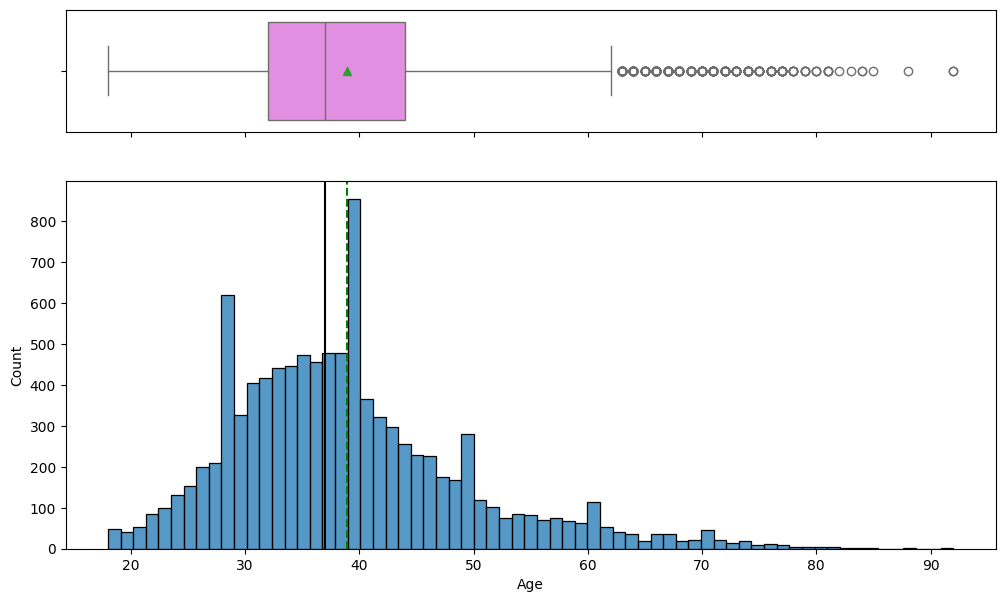

In [ ]:
histogram_boxplot(churn_data,'Age')

- Age is right skewed



#### Creditscore

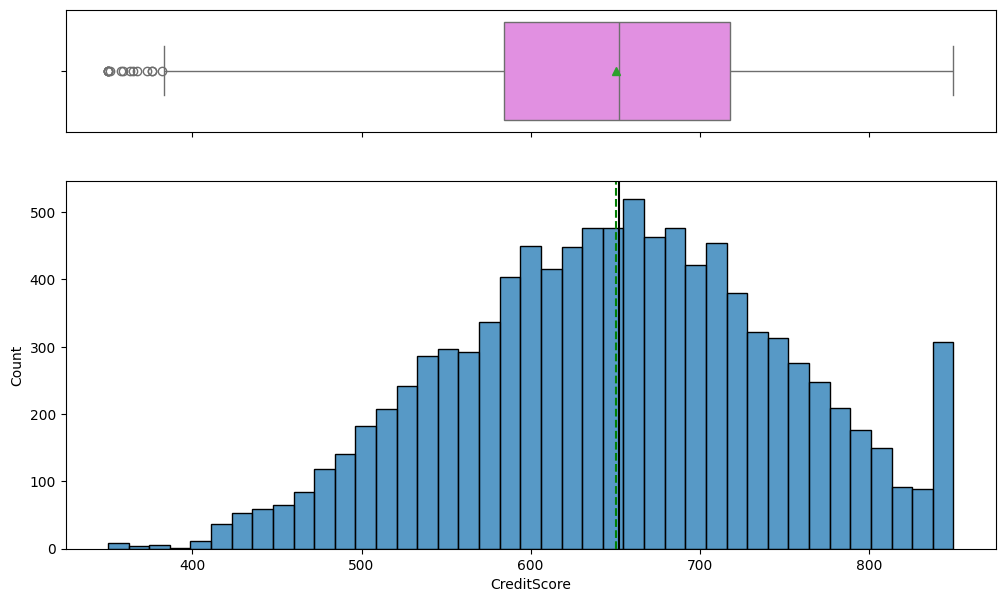

In [ ]:
histogram_boxplot(churn_data,'CreditScore')

- Creditscore is slightly left skewed



#### Tenure

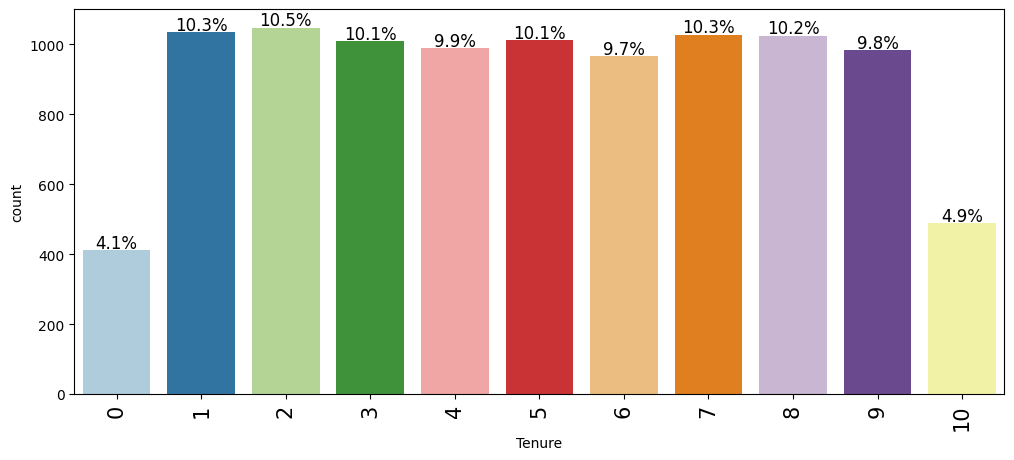

In [ ]:
labeled_barplot(churn_data, "Tenure",perc=True)

- Majority of the customers have a tenure from 1 to 9 years.
- Only few customers around 4.1% have 0 years of tenure. They might be either new customer or those who are yet to complete one year.
- This spread indicates that either customers leave within one year or they tend tp stay long




#### Geography

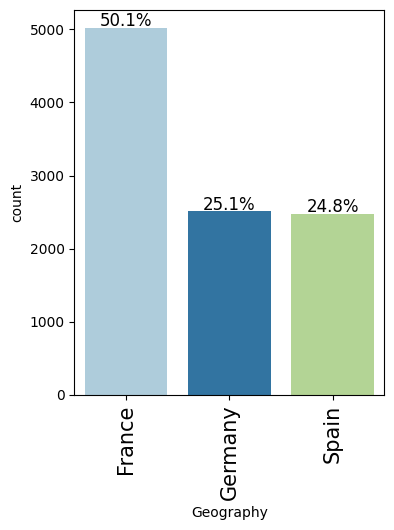

In [ ]:
labeled_barplot(churn_data, "Geography",perc=True)

- More no. of customers are from France



#### Gender

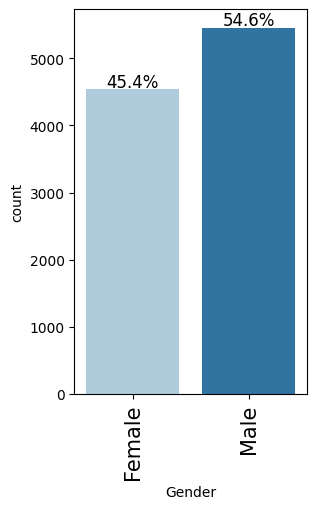

In [ ]:
labeled_barplot(churn_data, "Gender",perc=True)



#### Balance

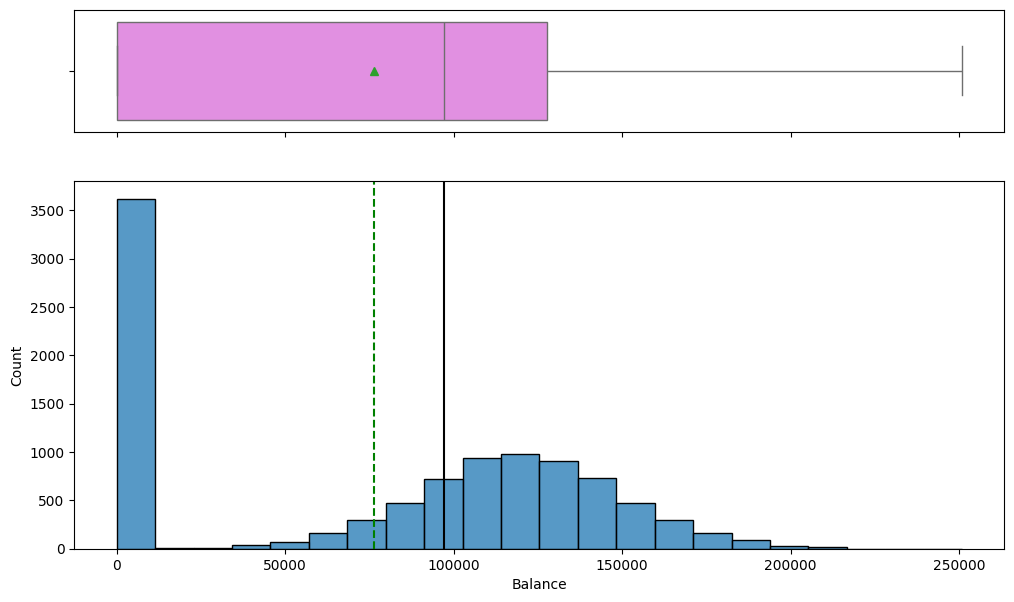

In [ ]:
histogram_boxplot(churn_data,'Balance')

-  A substantial number of customers maintain no balance, which might indicate inactive accounts or special types of accounts where maintaining a balance is not required.
- For customers with non-zero balances, the distribution is right skewed.
- The majority of the customers have balances concentrated around 50000 to 100000, with a few holding much larger amounts.



#### NumOfProducts

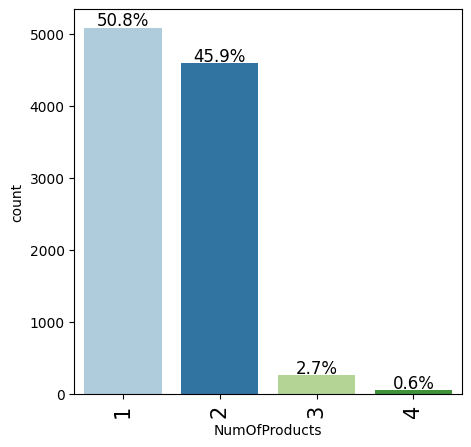

In [ ]:
labeled_barplot(churn_data, "NumOfProducts",perc=True)

- Majority of the customers around 50.8% holds only one product and 45.9% of customers holds 2 products and the rest rae very low.



#### HasCrCard

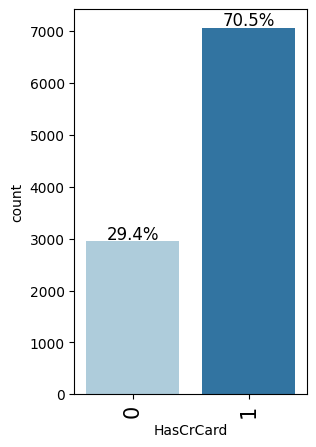

In [ ]:
labeled_barplot(churn_data, "HasCrCard",perc=True)

- Majority of customers around 70.5% has credit card.

#### IsActiveMember

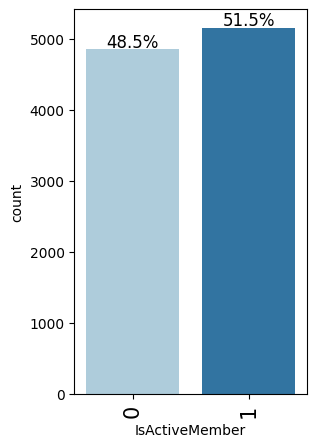

In [ ]:
labeled_barplot(churn_data, "IsActiveMember",perc=True)

- Around 48.5% of customers are not active members.
- Around 51.5% of customers are active members.
- The proportion of active and inactive members is almost balanced, with a slightly higher percentage of active members (51.5%).
- This close distribution suggests that nearly half of the bank's customers are not actively engaging with their accounts, which could be a potential indicator of future churn risk.

#### EstimatedSalary

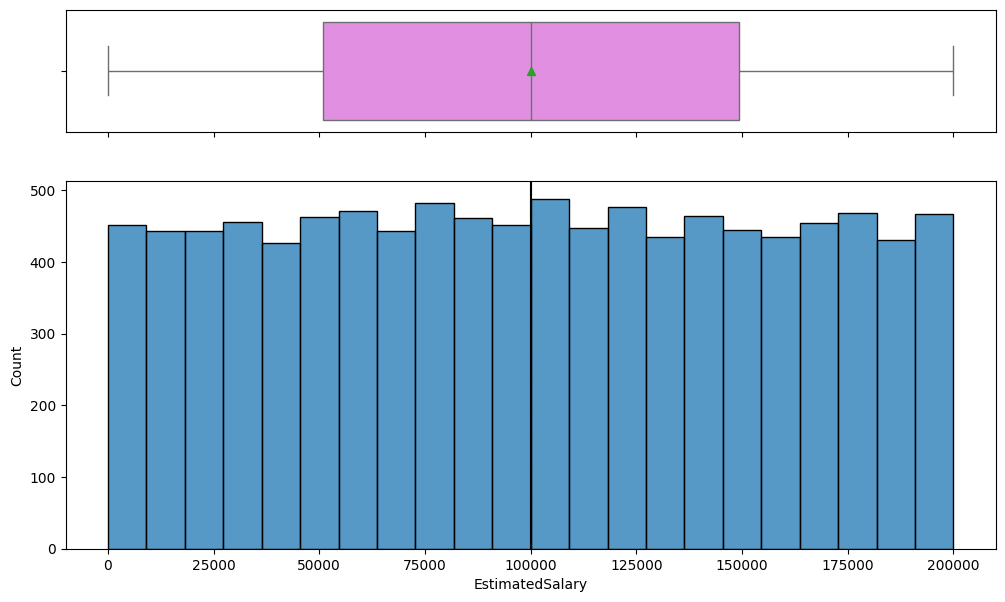

In [ ]:
histogram_boxplot(churn_data,'EstimatedSalary')

- EstimatedSalary has equal distribution

#### Exited

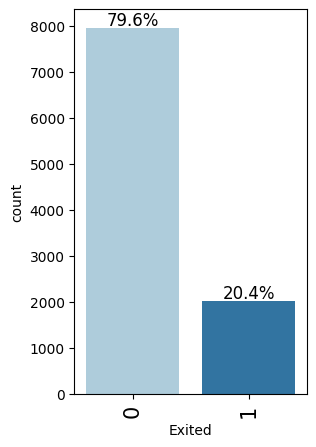

In [ ]:
labeled_barplot(churn_data, "Exited",perc=True)

- Both classes are not not balanced, 79.6% of customers are staying with the bank and only 20.4% of customers left the bank.

### Bivariate Analysis

####Bivariate plot functions

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correletaion

In [ ]:
#define list of numerical columns

num_cols=['CreditScore','Age','Tenure','Balance','EstimatedSalary']


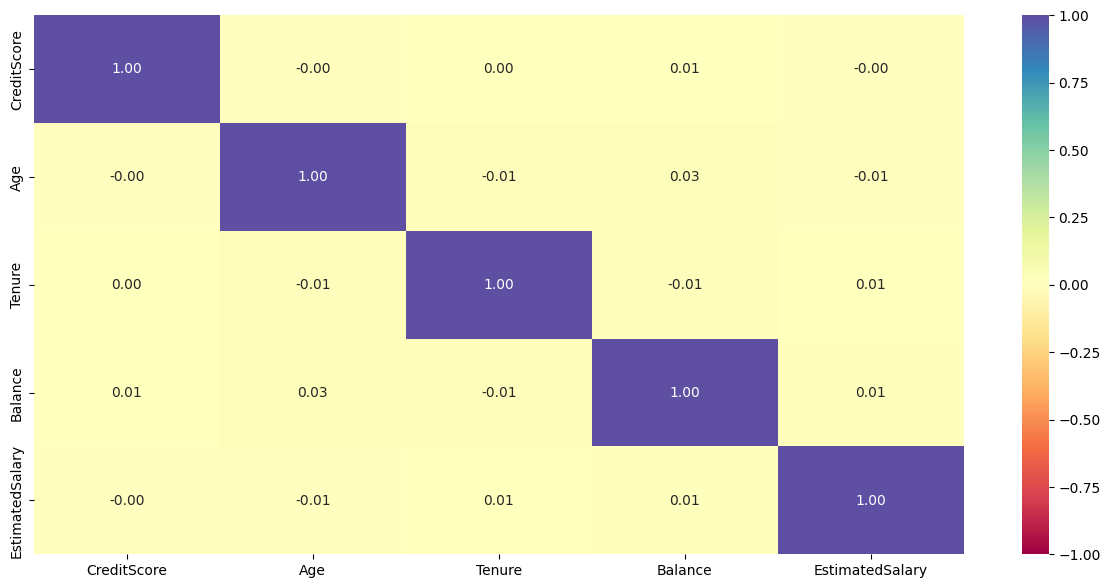

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(churn_data[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- No correlation between the feautures

#### Exited VS CreditScore

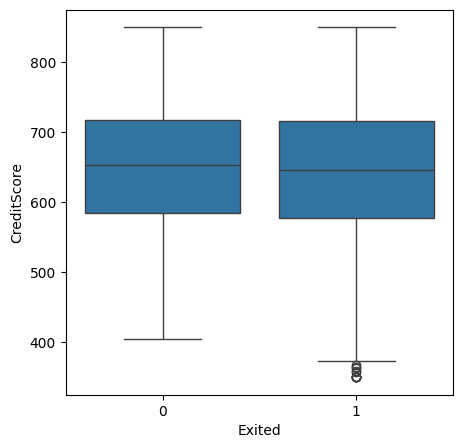

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=churn_data)
plt.show()

- Both categories have a similar median and spread of the creditscores.
- This may not be a stronger predictor.

#### Exited VS Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


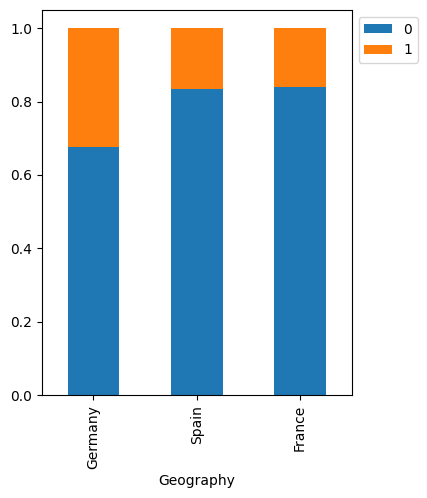

In [ ]:
stacked_barplot(churn_data,"Geography","Exited")

- Customers in Germany tend to have higher churning percentage.

#### Exited VS Age

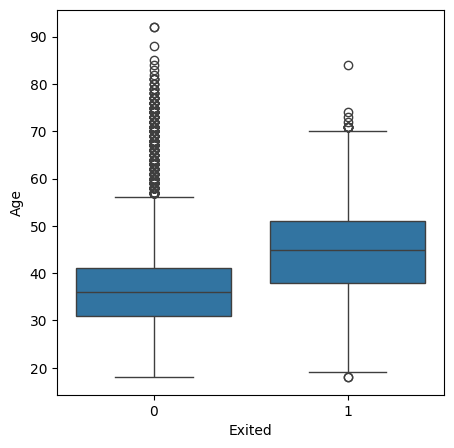

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=churn_data)
plt.show()

- The median age of customers who exited (Exited = 1) is higher than the median age of customers who stayed (Exited = 0). This shows that older customers are more likely to exit.
- The customers who exited (Exited = 1) tend to be older, with fewer younger customers in this group.
- Customers who stayed (Exited = 0) have a lower median age and a wider spread of ages, indicating a more diverse age range.
- Customers who exited (Exited = 1) tend to be older on average, with a more concentrated age range (mostly between 40 and 60).
- Age might be a stronger predictor of whether a customer exits, with older customers being more likely to leave compared to younger ones.

#### Exited VS Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


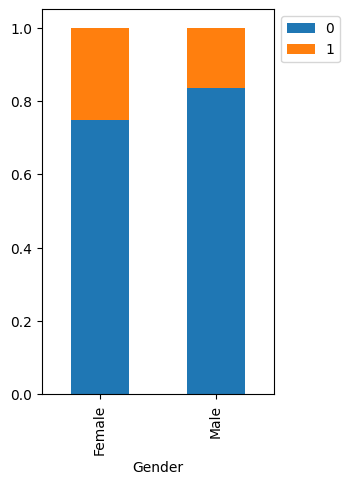

In [ ]:
stacked_barplot(churn_data,"Gender","Exited")

- More female customers are tend to leave.

#### Exited VS Tenure

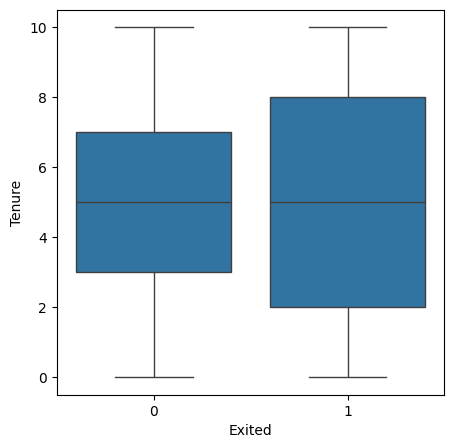

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=churn_data)
plt.show()

- Median tenure for both Exited and Not exited are almost same but there is a slight trend where customers with longer tenures around 6-10 years are somewhat more likely to exit, while those with shorter tenures around 4-5 years tend to stay.








#### Exited VS Balance

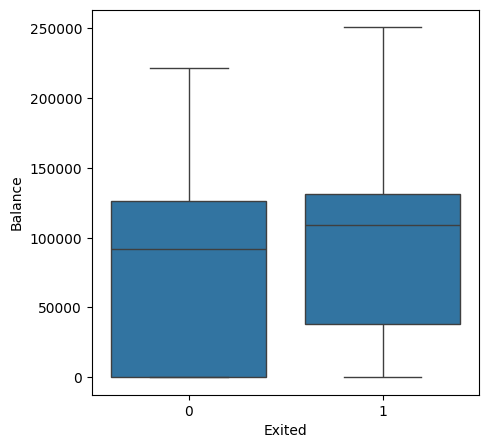

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=churn_data)
plt.show()

- For Exited = 0 the median balance is slightly below 100,000 and for 1 its slightly above 100000.
- This minor difference in median balance tells that customers who stayed tend to have a slightly lower balance compared to those who exited, although the overall distribution remains fairly similar for both group

#### Exited VS NumOfProducts

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


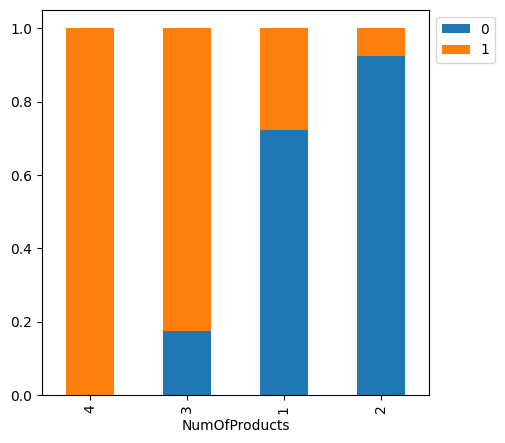

In [ ]:
stacked_barplot(churn_data,"NumOfProducts","Exited")

- Customers with fewer products 1 or 2 are more likely to stay with the company. Customers with more products 3 or 4 are more likely to leave, with all customers holding 4 products having exited.
- Customers having more no. of products likely to exit, which could be an indicator of dissatisfaction, over-commitment, or other factors related to customer experience.

#### Exited VS HasCrCard

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


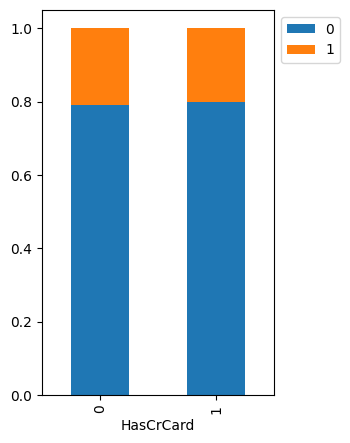

In [ ]:
stacked_barplot(churn_data,"HasCrCard","Exited")

- Both classes have same percentage

#### Exited VS IsActiveMember

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


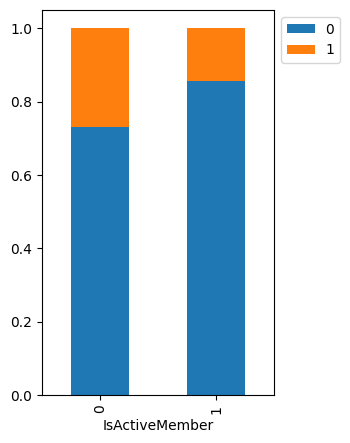

In [ ]:
stacked_barplot(churn_data,"IsActiveMember","Exited")

- Inactive customers tend to leave the bank more when compared to active members

#### Exited VS EstimatedSalary

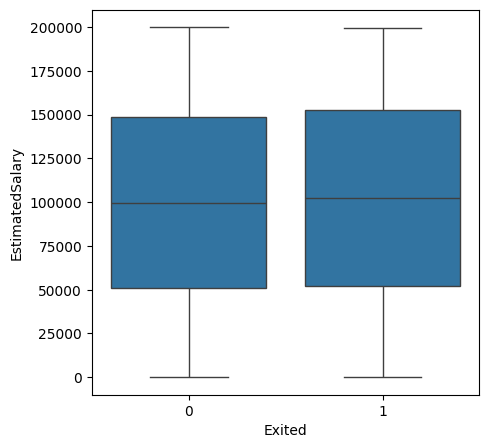

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=churn_data)
plt.show()

- The distibution is almost same for both the classes.

## Data Preprocessing

###Convert data type

In [ ]:
conv_cols = ['Geography', 'Gender','NumOfProducts','HasCrCard','IsActiveMember']
churn_data[conv_cols] = churn_data[conv_cols].astype('category')



In [ ]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  category
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(5), float64(2), int64(4)
memory usage: 518.4 KB


### Train-validation-test Split

In [ ]:
churn_data.shape

(10000, 11)

In [ ]:
#splitting features and target variables

X = churn_data.drop(['Exited'],axis=1)
y = churn_data['Exited']

In [ ]:
# Splitting the dataset into the Training and Test set.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify = y)

In [ ]:
# Splitting the Train dataset into the Training and Validation set.
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42,stratify = y_train)

In [ ]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_valid: ",X_valid.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_valid: ",y_valid.shape)
print("Shape of y_test: ",y_test.shape)

Shape of X_train:  (6400, 10)
Shape of X_valid:  (1600, 10)
Shape of X_test:  (2000, 10)
Shape of y_train:  (6400,)
Shape of y_valid:  (1600,)
Shape of y_test:  (2000,)


### Dummy Variable Creation

In [ ]:
X_train = pd.get_dummies(X_train,drop_first=True)
X_valid = pd.get_dummies(X_valid,drop_first=True)
X_test = pd.get_dummies(X_test,drop_first=True)

In [ ]:
X_train.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1,IsActiveMember_1
3006,747,45,1,114959.12,189362.39,False,False,False,False,False,False,True,False
5735,585,44,4,0.00,101728.46,False,True,False,True,False,False,False,True
5652,691,29,9,0.00,199635.93,False,False,False,True,False,False,False,False
26,756,36,2,136815.64,170041.95,True,False,True,False,False,False,True,True
3596,643,36,0,148159.71,55835.66,False,False,True,False,False,False,False,False


In [ ]:
X_valid.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1,IsActiveMember_1
7140,703,39,6,152685.40,183656.12,False,True,True,False,False,False,False,False
7334,616,18,6,0.00,27308.58,False,False,True,True,False,False,True,True
1651,634,31,9,108632.48,179485.96,False,True,True,False,False,False,True,True
2953,650,43,6,0.00,16301.91,False,False,False,True,False,False,True,True
1785,713,40,3,114446.84,87308.18,True,False,True,True,False,False,True,True


In [ ]:
X_test.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_1,IsActiveMember_1
5702,585,36,7,0.00,94283.09,False,False,True,True,False,False,True,False
3667,525,33,4,131023.76,55072.93,True,False,True,True,False,False,False,False
1617,557,40,4,0.00,105433.53,False,True,False,True,False,False,False,True
5673,639,34,5,139393.19,33950.08,False,True,True,True,False,False,False,False
4272,640,34,3,77826.80,168544.85,False,True,False,False,False,False,True,True


In [ ]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(6400, 13)
(1600, 13)
(2000, 13)


### Data Normalization

In [ ]:
num_cols = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']

In [ ]:
transformer = StandardScaler()
X_train[num_cols]=transformer.fit_transform(X_train[num_cols])
X_valid[num_cols]=transformer.transform(X_valid[num_cols])
X_test[num_cols]=transformer.transform(X_test[num_cols])

### Performance metrics functions

In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

## Model Building

### Model Evaluation Criterion

**A model can make wrong predictions in the following ways:**

* The model predicts customer left the bank(churned - 1) when they actually stayed - False Positive
* The model predicts customer not leaving the bank(no churn) when they left - False Negative


**Which case is more important?**

Both the cases are important but when comparing both the scenarios predicting a churner as non-churner is more costlier. False Negatives can be more costly because they represent missed opportunities to take action on customers who are at risk of leaving the bank.

**How to reduce this loss i.e need to reduce False Negatives?**

To reduce False negatives in this scenario where predicting customer churn is crucial, the most appropriate metric to focus on would be the Recall


In [ ]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 25
batch_size = 64

### Neural Network with SGD Optimizer

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(64,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(32,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:

history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)


Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.5939 - val_loss: 0.4839
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4805 - val_loss: 0.4517
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4566 - val_loss: 0.4383
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4447 - val_loss: 0.4290
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4359 - val_loss: 0.4220
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4292 - val_loss: 0.4167
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4241 - val_loss: 0.4124
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4201 - val_loss: 0.4089
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4168 - val_loss: 0.4060
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4141 - val_loss: 0.4033
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4117 - val_loss: 0.4010
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

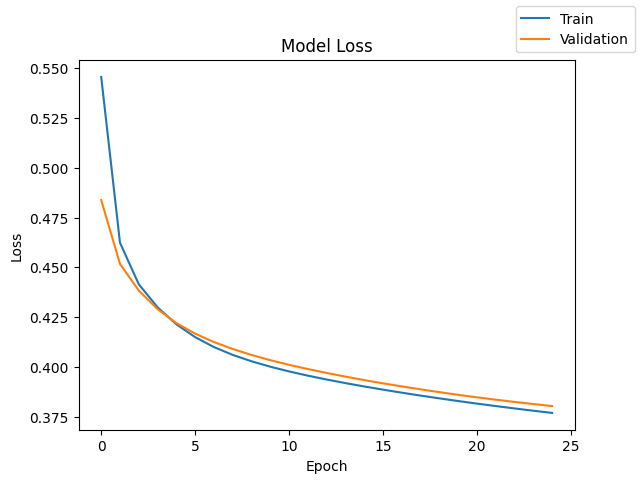

In [ ]:
plot(history,'loss')

In [ ]:
model_0_train_perf = model_performance_classification(model, X_train, y_train)
model_0_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.840313,0.840313,0.828,0.815235


In [ ]:
model_0_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_0_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.840625,0.840625,0.831862,0.811842


- Both the training and validation losses are decreasing.
- After around 10–15 epochs, both the training and validation losses are starting to converge. The gap between them remains small, indicating that the model is generalizing well.
- Both curves are continuing to decrease in sync, which means the model is not overfitting yet
- There is not much difference with the training and validation recall score but still we can improve the Recall score by trying different optimiztion methods



## Model Performance Improvement

### Neural Network with Adam Optimizer

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model1 = Sequential()
model1.add(Dense(64,activation="relu",input_dim=X_train.shape[1]))
model1.add(Dense(32,activation="relu"))
model1.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,011 (11.77 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer
model1.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:

history = model1.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)


Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.4927 - val_loss: 0.4029
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3985 - val_loss: 0.3793
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3815 - val_loss: 0.3725
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3730 - val_loss: 0.3693
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3670 - val_loss: 0.3675
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3627 - val_loss: 0.3658
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3590 - val_loss: 0.3645
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3560 - val_loss: 0.3632
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3532 - val_loss: 0.3622
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3508 - val_loss: 0.3610
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3485 - val_loss: 0.3597
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

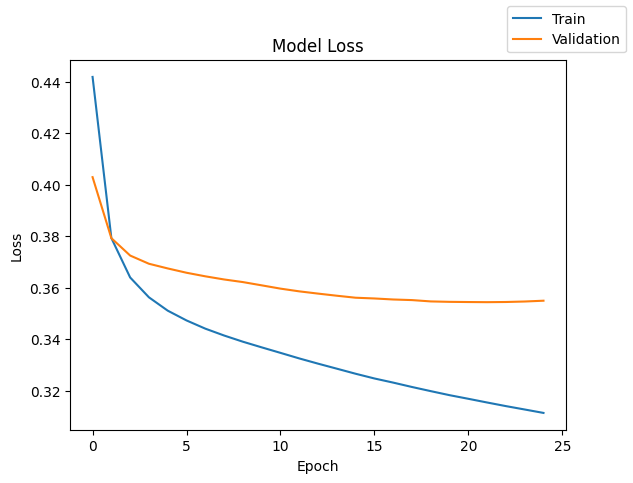

In [ ]:
plot(history,'loss')

In [ ]:
model_1_train_perf = model_performance_classification(model1, X_train, y_train)
model_1_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.867188,0.867188,0.858797,0.856948


In [ ]:
model_1_valid_perf = model_performance_classification(model1, X_valid, y_valid)
model_1_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.8575,0.8575,0.848033,0.842031


- Training loss curve shows a steady downward trend, indicating that the model continues to improve its performance on the training data.
- Validation curve shows a similar initial downward trend.
- Recall scores has improved. Lets try adding Dropout with Adam


### Neural Network with Adam Optimizer and Dropout

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model2 = Sequential()
model2.add(Dense(64,activation="relu",input_dim=X_train.shape[1]))
model2.add(Dropout(0.5))
model2.add(Dense(32,activation="relu"))
model2.add(Dropout(0.3))
model2.add(Dense(1,activation="sigmoid"))

In [ ]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()
model2.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:

history = model2.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)


Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.6125 - val_loss: 0.4272
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4460 - val_loss: 0.4057
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4295 - val_loss: 0.3956
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4284 - val_loss: 0.3885
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4149 - val_loss: 0.3827
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4090 - val_loss: 0.3771
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3963 - val_loss: 0.3738
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4012 - val_loss: 0.3732
Epoch 9/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3977 - val_loss: 0.3722
Epoch 10/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3876 - val_loss: 0.3682
Epoch 11/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3899 - val_loss: 0.3692
Epoch 12/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

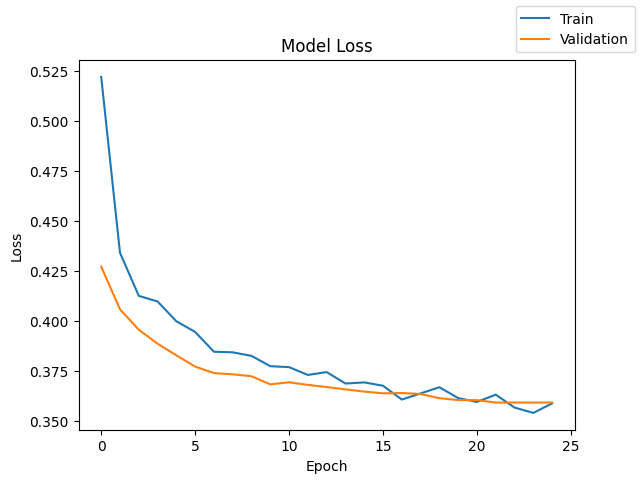

In [ ]:
plot(history,'loss')

In [ ]:
model_2_train_perf = model_performance_classification(model2, X_train, y_train)
model_2_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.859375,0.859375,0.853847,0.840081


In [ ]:
model_2_valid_perf = model_performance_classification(model2, X_valid, y_valid)
model_2_valid_perf


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.853125,0.853125,0.8473,0.83053


- The training loss is decreasing over time, indicating that the model is learning and improving its performance on the training data.
- The validation loss also decreases in the beginning, which is a good sign that the model is generalizing well on unseen data
- The training and validation loss both decrease, which indicates the model is learning well and it indicates no overfitting.
- Training and validation recall is very close indicating that the model is generalizing well with the unseen data.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [ ]:
# importing SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("Before Oversampling, the shape of train_X: {}".format(X_train.shape))
print("Before Oversampling, the shape of train_y: {} \n".format(y_train.shape))

sm = SMOTE(random_state=1)

# Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))


Before Oversampling, counts of label 'Yes': 1304
Before Oversampling, counts of label 'No': 5096 

Before Oversampling, the shape of train_X: (6400, 13)
Before Oversampling, the shape of train_y: (6400,) 

After Oversampling, counts of label 'Yes': 5096
After Oversampling, counts of label 'No': 5096 

After Oversampling, the shape of train_X: (10192, 13)
After Oversampling, the shape of train_y: (10192,) 



In [ ]:
tf.keras.backend.clear_session()

In [ ]:

model3 = Sequential()
model3.add(Dense(64,activation="relu",input_dim=X_train_over.shape[1]))
model3.add(Dense(32,activation="relu"))
model3.add(Dense(1,activation="sigmoid"))

In [ ]:
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD()
model3.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
history = model3.fit(X_train_over, y_train_over, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6864 - val_loss: 0.6362
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6362 - val_loss: 0.5880
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5966 - val_loss: 0.5589
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5695 - val_loss: 0.5422
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5531 - val_loss: 0.5328
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5427 - val_loss: 0.5260
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5352 - val_loss: 0.5206
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5290 - val_loss: 0.5159
Epoch 9/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5235 - val_loss: 0.5116
Epoch 10/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5187 - val_loss: 0.5076
Epoch 11/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5143 - val_loss: 0.5039
Epoch 12/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

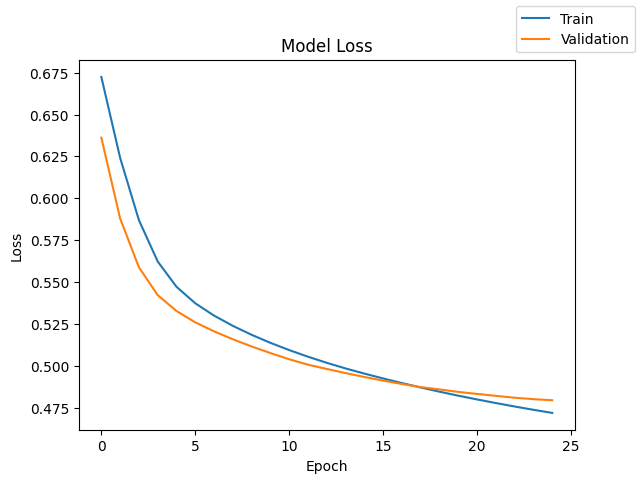

In [ ]:
plot(history,'loss')

In [ ]:
model_3_train_perf = model_performance_classification(model3, X_train_over, y_train_over)
model_3_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.779827,0.779827,0.779948,0.779803


In [ ]:
model_3_valid_perf = model_performance_classification(model3, X_valid, y_valid)
model_3_valid_perf


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.76375,0.76375,0.82942,0.78248


- The training and validation loss is consistently decreasing over time, which is a good sign. It shows that the model is learning and improving its performance on the training data.
- Model is doing well on training as well as validation which shows model doesnt have overfitting. But Recall score has came down a lot.
- Lets try adding one more hidden layer

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
#adding on more hidden layer and increase the no of nuerons
model4 = Sequential()
model4.add(Dense(128,activation="relu",input_dim=X_train_over.shape[1]))
model4.add(Dense(64,activation="relu"))
model4.add(Dense(32,activation="relu"))
model4.add(Dense(1,activation="sigmoid"))

In [ ]:
model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,161 (47.50 KB)

 Trainable params: 12,161 (47.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD()
model4.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
history = model4.fit(X_train_over, y_train_over, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6734 - val_loss: 0.6614
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6436 - val_loss: 0.6230
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6112 - val_loss: 0.5898
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5831 - val_loss: 0.5654
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5620 - val_loss: 0.5479
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5461 - val_loss: 0.5340
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5332 - val_loss: 0.5233
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5219 - val_loss: 0.5136
Epoch 9/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5123 - val_loss: 0.5069
Epoch 10/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5042 - val_loss: 0.5025
Epoch 11/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4976 - val_loss: 0.4998
Epoch 12/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

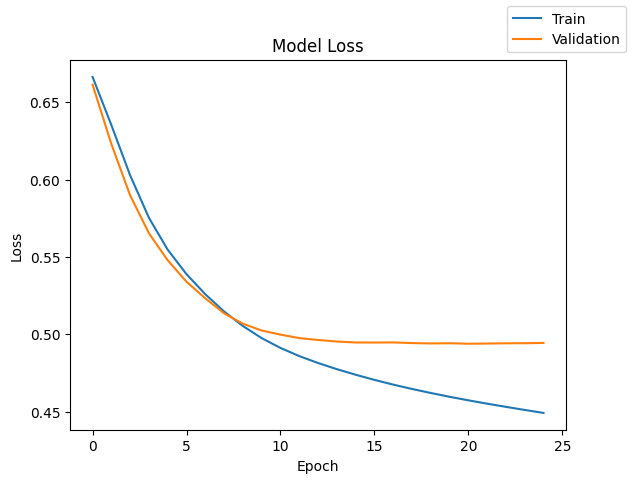

In [ ]:
plot(history,'loss')

In [ ]:
model_4_train_perf = model_performance_classification(model4, X_train_over, y_train_over)
model_4_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.791111,0.791111,0.791689,0.791007


In [ ]:
model_4_valid_perf = model_performance_classification(model4, X_valid, y_valid)
model_4_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.76375,0.76375,0.832158,0.782833


- Model is not performing well with validation set.
- Lets try with Adam optimizer with 3 layers.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model5 = Sequential()
model5.add(Dense(64,activation="relu",input_dim=X_train_over.shape[1]))
model5.add(Dense(32,activation="relu"))
model5.add(Dense(1,activation="sigmoid"))

In [ ]:
model5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()
model5.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
history = model5.fit(X_train_over, y_train_over, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.6485 - val_loss: 0.4922
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4974 - val_loss: 0.4705
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4704 - val_loss: 0.4667
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4579 - val_loss: 0.4640
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4489 - val_loss: 0.4605
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4420 - val_loss: 0.4588
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4361 - val_loss: 0.4566
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4308 - val_loss: 0.4549
Epoch 9/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4259 - val_loss: 0.4543
Epoch 10/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4213 - val_loss: 0.4519
Epoch 11/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4167 - val_loss: 0.4510
Epoch 12/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

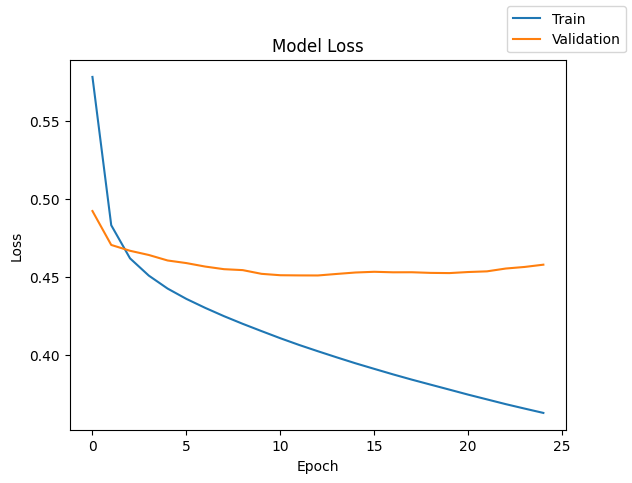

In [ ]:
plot(history,'loss')

In [ ]:
model_5_train_perf = model_performance_classification(model5, X_train_over, y_train_over)
model_5_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.839384,0.839384,0.839386,0.839384


In [ ]:
model_5_valid_perf = model_performance_classification(model5, X_valid, y_valid)
model_5_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.796875,0.796875,0.826219,0.807302


- Training loss continues to decrease steadily, showing the model is learning from the training data.
- Validation loss, however, starts to flatten after the initial few epochs, indicating that the model may no longer generalize as well to the validation data as it learns from the training data. There seems to be overfitting.
- We can try adding dropouts

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model6 = Sequential()
model6.add(Dense(64,activation="relu",input_dim=X_train_over.shape[1]))
model6.add(Dropout(0.5))
model6.add(Dense(32,activation="relu"))
model6.add(Dropout(0.3))
model6.add(Dense(1,activation="sigmoid"))

In [ ]:
model6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()
model6.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
history = model6.fit(X_train_over, y_train_over, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)

Epoch 1/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.6513 - val_loss: 0.5299
Epoch 2/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5632 - val_loss: 0.5047
Epoch 3/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5329 - val_loss: 0.4941
Epoch 4/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5210 - val_loss: 0.4833
Epoch 5/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5062 - val_loss: 0.4760
Epoch 6/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5048 - val_loss: 0.4715
Epoch 7/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4979 - val_loss: 0.4709
Epoch 8/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4908 - val_loss: 0.4707
Epoch 9/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4839 - val_loss: 0.4648
Epoch 10/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4843 - val_loss: 0.4702
Epoch 11/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4814 - val_loss: 0.4617
Epoch 12/25
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

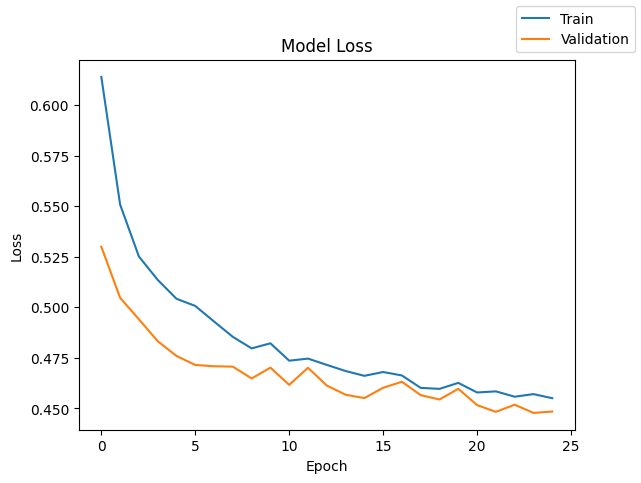

In [ ]:
plot(history,'loss')

In [ ]:
model_6_train_perf = model_performance_classification(model6, X_train_over, y_train_over)
model_6_train_perf

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.799058,0.799058,0.800169,0.798872


In [ ]:
model_6_valid_perf = model_performance_classification(model6, X_valid, y_valid)
model_6_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.806875,0.806875,0.83821,0.817428


- Initially, the training loss is high, but it decreases steadily as the number of epochs increases, which indicates that the model is learning from the training data.
- The curve flattens after around 15 epochs, showing the training loss is stabilizing.
- Like the training loss, the validation loss decreases over time, but it starts lower than the training loss at the beginning and converges around 15 epochs.
- The fact that both training and validation loss decrease and converge is a sign that the model is learning and not overfitting.
- Recall score has improved
- The small difference between the training and validation recall scores suggests that the model is generalizing well. This means that the model performs similarly on both the data it was trained on and the unseen validation data.

## Model Performance Comparison and Final Model Selection

In [ ]:
models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T
    ],
    axis=1,)

models_train_comp_df.columns = [
    "SGD Optimizer",
    "Adam Optimizer",
    "Adam Optimizer and Dropout",
    "SGD Optimizer and SMOTE",
    "Adam Optimizer and SMOTE",
    "Adam Optimizer and Dropout and SMOTE"
]

In [ ]:
models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_5_valid_perf.T,
        model_6_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "SGD Optimizer",
    "Adam Optimizer",
    "Adam Optimizer and Dropout",
    "SGD Optimizer and SMOTE",
    "Adam Optimizer and SMOTE",
    "Adam Optimizer and Dropout and SMOTE"
]

In [ ]:
models_train_comp_df

,SGD Optimizer,Adam Optimizer,Adam Optimizer and Dropout,SGD Optimizer and SMOTE,Adam Optimizer and SMOTE,Adam Optimizer and Dropout and SMOTE
Accuracy,0.840313,0.867188,0.859375,0.779827,0.839384,0.799058
Recall,0.840313,0.867188,0.859375,0.779827,0.839384,0.799058
Precision,0.828000,0.858797,0.853847,0.779948,0.839386,0.800169
F1 Score,0.815235,0.856948,0.840081,0.779803,0.839384,0.798872


In [ ]:
models_valid_comp_df

,SGD Optimizer,Adam Optimizer,Adam Optimizer and Dropout,SGD Optimizer and SMOTE,Adam Optimizer and SMOTE,Adam Optimizer and Dropout and SMOTE
Accuracy,0.840625,0.857500,0.853125,0.76375,0.796875,0.806875
Recall,0.840625,0.857500,0.853125,0.76375,0.796875,0.806875
Precision,0.831862,0.848033,0.847300,0.82942,0.826219,0.838210
F1 Score,0.811842,0.842031,0.830530,0.78248,0.807302,0.817428


**Observations and Final model selection**

- Adam Optimizer without SMOTE or Dropout consistently shows the best performance across both train and validation set.
- In both cases, Adam without SMOTE or Dropout provides the highest scores across all metrics, it balances well between correctly identifying churners (recall) and minimizing false positives (precision).
- The **Neural Network with Adam Optimizer (without SMOTE or Dropout) is the best fit** for predicting bank churn due to its consistently high recall, precision, and F1 score, indicating it can reliably identify customers who are likely to leave while maintaining a balance between true and false positives.

## Actionable Insights and Business Recommendations



1.   **Active vs. Inactive Members**
*   **Insight**: Customers who are inactive are more likely to churn.
*   **Action**: We can try implementing targeted re-engagement strategies, such as personalized emails or special offers, to reactivate these customers.


2.  **Tenure**


*   **Insight**: Customers with longer tenures around 6-10 years are somewhat more likely to exit, while those with shorter tenures around 4-5 years tend to stay.
*   **Action**: Introduce loyalty programs or exclusive benefits for newer customers to retain them longer.



3.   **Age**


*   **Insight**: Older customers being more likely to leave compared to younger ones.
*   **Action**: For older customers, we can try emphasizing security and long-term savings.



4.   **Geography**


*   **Insight**: Customers in Germany tend to have higher churning percentage.
*   **Action**: Action: We can try creating regional marketing strategies focusing on retention efforts there, such as offering region-specific products or adjusting branch-level services.


5.   **NumOfProducts**


*   **Insight**: Customers having more no. of products likely to exit.  Which could be because of dissatisfaction, over-commitment, or other factors related to customer experience
*   **Action**: We can try offering loyalty or retention programs. Offer personalized financial advice and premium services (like a dedicated relationship manager, higher interest on savings, or premium credit cards) to customers with multiple products.




















<font size=6 color='blue'>Power Ahead</font>
___